#9.1 순차 데이터와 순환 신경망

**순차 데이터**

- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 이를 다룰 때는 이전에 입력한 데이터를 기억하는 능력이 필요하다
- 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다 -> **순환신경망(RNN)**이라고 부른다

**피드포워드 신경망**

- 입력데이터의 흐름이 앞으로만 전달되는 신경망
- 한번 샘플을 쓰고 버리는 신경망
- ex) 완전 연결 신경망, 합성곱 신경망

**순환 신경망(RNN)**

타임스텝

- 샘플을 처리하는 한 단계

셀

- 층

은닉 상태

- 셀의 출력



- 다음 샘플의 은닉상태를 만들기 위해서 이전 타임스텝의 은닉상태를 이용한다

- 타임스텝이 지날 수록 오래된 샘플에 대한 정보는 희미해진다

- 활성화 함수도 꼭 필요하고, 보통 tanh함수를 많이 쓴다

- 순환 신경망의 모델파라미터

    - 입력(샘플)에 곱해지는 가중치 (Wx)
    - 재사용하는 은닉상태에 곱해지는 가중치  (Wh)  (1개 뿐)
    - 절편  (b)

- 은닉상태 = (Wx) * (입력) + (Wh) * (이전 타임스텝의 은닉상태) + b

**셀의 가중치와 입출력**

#9.2 순환 신경망으로 IMDB 리뷰  분류하기

자연어 처리

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야
- 말뭉치 : 훈련데이터

**IMDB 리뷰 데이터셋**

- 인터넷 영화 데이터베이스 imdb.com에서 수집한 리뷰를 긍정과 부정으로 분류해놓은 데이터셋
- 50000개의 샘플, 25000개 씩 훈련, 테스트 데이터
- 텍스트를 어떤 숫자 데이터로 바꾼다..(일반적으로 등장하는 단어마다 고유한 정수를 부여한다)
- 그렇게 분리된 단어를 **토큰**이라고 한다
- 토큰 중에 특이한 토큰도 있다

    - 0: 패딩, 1: 문장의 시작, 2: 어휘사전에 없는 토큰

- 어휘사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록

In [1]:
#데이터 가져오기
#num_words 매개변수를 사용해서 데이터셋에서 가장 자주 등장하는 단어 몇개만 사용할지 지정
#즉, 어휘사전의 갯수를 지정..

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(train_input.shape, test_input.shape)

#리뷰 텍스트의 길이가 제각각이라서 1차원 리스트에 담는게 효율적이다.
#[리뷰1, 리뷰2, ...] 이런식으로..

(25000,) (25000,)


In [4]:
print(len(train_input[0]))

#218개의 토큰으로 이루어짐..

218


In [5]:
print(len(train_input[1]))

189


In [6]:
print(train_input[0])
#어휘세트 500개에 없는 단어는 2..

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
#타깃 데이터.. 0(부정) / 1(긍정)
#이진분류..

print(train_target)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
#검증세트 분리

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
#훈련세트 조사좀 해보자..
#평균 길이..

import numpy as np
lengths = np.array([len(x) for x in train_input])
# 각 훈련데이터의 길이를 갖는 lengths 배열을 만들엇다

In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


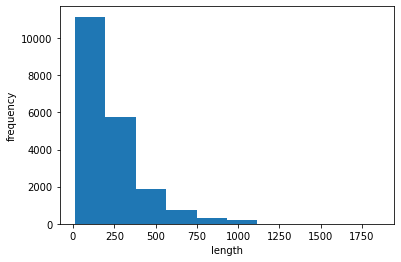

In [11]:
#훈련데이터의 분포는?
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 대부분 리뷰는 300 미만
- 길이가 100까지만 보자..

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

#훈련 텍스트 세트의 길이를 maxlen매개변수를 이용해서 맞출 수 있다
#기본값을 뒤에서 부터 자르는데, pad_sequences의 truncating매개변수를 'pre' / 'post'로 지정해서 바꿀 수 있다

In [13]:
print(train_seq.shape)
#이차원 배열이다..

(20000, 100)


In [14]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [15]:
print(train_input[0][-10:])
#이걸로 보면 끝에 100개를 잘라서 가져왔다..

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [16]:
print(train_seq[5])
#얘는 원래 길이가 100보다 짧았네.. 그니까 100으로 맞출려고 패딩(0)이 들어갔네..

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
#검증세트도 길이 100으로 바꾸자
val_seq = pad_sequences(val_input, maxlen=100)

**순환 신경망(RNN) 만들기**

- SimpleRNN클래스로 순환층 클래스를 만들 수 있다..
- 이진 분류이니까 시그모이드
- Sequential 클래스는 일반적인 신경망 모델을 다 만들 수 있다
- 다만 Sequential이라는 이름은 순서대로 층을 쌓기 때문에 붙인 것이다.

In [18]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape = (100,500)))
#SimpleRNN의 기본 활성화함수 : tanh함수

model.add(keras.layers.Dense(1,activation = 'sigmoid'))
#이진 분류니까 마지막 출력층의 뉴런이 1개

**왜 input_shape가 (100,500)일까?**

- 명백히 토큰의 값에는 상관관계가 없다.
- 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하기 위해서 원핫인코딩을 표현한다.
- 길이가 원래 100인 데이터였는데, 그 100개의 정수가 모두 원핫인코딩 되고, 앞에서 어휘사전을 500개로 잡았으니까 크기가 (100,500)으로 바뀐다.

-> **원핫인코딩 때문!!**

In [19]:
# 원핫인코딩을 위한 유틸리티 keras.utils의 to_categorical

train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

#100개의 정수 하나하나가 원핫인코딩 되었기 때문에 크기가 100, 500으로 바뀌었다
#그래서 input_shape에 (100, 500)을 넣은 것이다.

(20000, 100, 500)


In [21]:
print(train_oh[0][0][:12])
#첫번째 훈련데이터의 첫번째 원핫인코딩된 것의 인덱스 12까지 출력

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [22]:
print(np.sum(train_oh[0][0]))
#잘 원핫인코딩 되었다..

1.0


In [23]:
#검증세트도 원핫인코딩..
#val_seq가 길이 100으로 줄인 것
val_oh = keras.utils.to_categorical(val_seq)

In [24]:
model.summary()
#순환층의 모델파라미터 엄청 많다.. (4072)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


**순환 신경망 훈련하기**

케라스의 장점

- 모델을 만드는 것은 달라도 훈련법은 같다

- 옵티마이저 설정, 콜백설정..

In [27]:
#학습률을 별도로 지정하기 위해 객체 생성..
#에포크는 100, 배치사이즈는 64로 지정..
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 41ms/step - loss: 0.6962 - accuracy: 0.5117 - val_loss: 0.6979 - val_accuracy: 0.4944
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6926 - val_accuracy: 0.5198
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6844 - accuracy: 0.5617 - val_loss: 0.6857 - val_accuracy: 0.5562
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6767 - accuracy: 0.5918 - val_loss: 0.6785 - val_accuracy: 0.5894
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6679 - accuracy: 0.6217 - val_loss: 0.6698 - val_accuracy: 0.6164
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6578 - accuracy: 0.6485 - val_loss: 0.6600 - val_accuracy: 0.6420
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6466 - accuracy: 0.6717 - val_loss: 0.6498 - val_ac

- 38에포크에서 검증점수 : 0.4785
- 39에포크에서 검증점수 : 0.4814 (증가)
- 40에포크에서 검증점수 : 0.4791 (38보다 증가)
- 41에포크에서 검증점수 : 0.4786 (38보다 증가)

-> 3번 참았다.. 끝 -> 성능 78퍼?

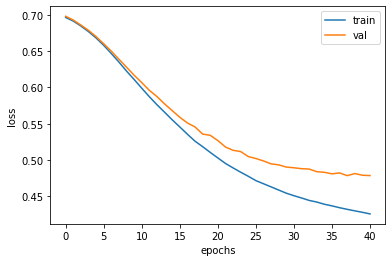

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


원-핫 인코딩을 하면 입력데이터가 너무 커진다..

다른 방법이 없을까?

**단어 임베딩을 사용하기**

**단어 임베딩**

- 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다..
- 이러한 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미있는 값이기 때문에 더 좋은 성능을 낸다
- keras.layers.Embedding클래스에서 임베딩 층을 만들 수 있다
- 입력으로 정수데이터를 입력받으니까 메모리를 훨씬 효율적으로 사용할 수 있다.
- 임베딩도 2차원 배열로 늘리긴 하지만 훨씬 크기가 작다

In [30]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
# 500 : 어휘사전의 크기 (이 만큼의 정수를 임베딩 벡터로 만들겠다)
# 16 : 임베딩 벡터의 크기 (원핫인코딩은 크기가 500이었는데 16으로 아주 작게 할 수 있다..)
#input_length=100 : 샘플의 길이를 100으로 맞추었다

model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [31]:
model2.summary()

#순환층의 모델 파라미터수가 위의 model(원핫 인코딩)보다 엄청 줄었다..
#(4072 -> 200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6951 - accuracy: 0.4981 - val_loss: 0.6951 - val_accuracy: 0.4892
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6912 - accuracy: 0.5245 - val_loss: 0.6906 - val_accuracy: 0.5280
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6823 - accuracy: 0.5870 - val_loss: 0.6787 - val_accuracy: 0.6068
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6658 - accuracy: 0.6526 - val_loss: 0.6609 - val_accuracy: 0.6636
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6451 - accuracy: 0.6981 - val_loss: 0.6414 - val_accuracy: 0.7012
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6251 - accuracy: 0.7200 - val_loss: 0.6250 - val_accuracy: 0.7142
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6056 - accuracy: 0.7380 - val_loss: 0.6064 - val_accuracy:

- 27에포크에서 검증점수 : 0.4669
- 28에포크에서 검증점수 : 0.4680 (증가)
- 29에포크에서 검증점수 : 0.4689 (27보다 증가)
- 30에포크에서 검증점수 : 0.4676 (27보다 증가)

-> 3번 참았다.. 끝 -> 성능 78퍼 -> 원핫인코딩과 비슷하다

-> 순환층의 모델파라미터가 훨씬 적다..

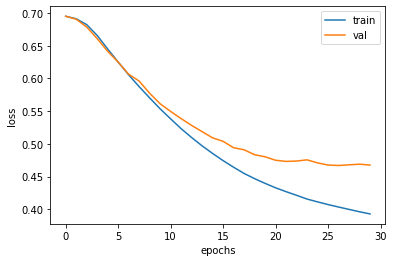

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련손실은 계속 감소하는데. 이를 개선할 방법이 있는지 알아보겟다..

**9-2 정리**

- 순환신경망을 실제 모델을 만들었다

1) 입력데이터를 원핫 인코딩으로 변환하여 순환층에 직접 주입

    -> 입력데이터가 너무 커서 메모리 낭비
    
    -> 어휘사전 크기의 벡터가 만들어짐
2) 입력데이터(정수)를 그대로 순환층에 넣기위해 Embedding층을 추가

    -> 단어마다 실수로 이루어진 밀집 벡터를 학습함
    
    -> 비교적 벡터의 크기가 작음
    
    -> 순환층의 모델 파라미터가 더 적음..
    
    -> 단어사이의 관계를 표현할 수 있기 때문에 성능이 더 좋다

#9.3 LSTM과 GRU 셀